In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 47.0MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/Telangana1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez
0,2000,1,1,0,0,17,0,0,0,14,0,0,0,0,0,0,0
1,2000,1,1,1,0,17,0,0,0,15,0,0,0,0,0,0,0
2,2000,1,1,2,0,19,62,205,94,16,69,69,147,147,0,92,92
3,2000,1,1,3,0,23,131,463,297,17,131,138,463,460,0,297,303
4,2000,1,1,4,0,25,170,605,490,17,170,166,605,624,0,490,496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,19,0,0,0,17,0,0,0,0,0,0,0
131396,2014,12,31,20,0,19,0,0,0,17,0,0,0,0,0,0,0
131397,2014,12,31,21,0,18,0,0,0,17,0,0,0,0,0,0,0
131398,2014,12,31,22,0,17,0,0,0,16,0,0,0,0,0,0,0


In [5]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(10)

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez,Date
0,2000,1,1,0,0,17,0,0,0,14,0,0,0,0,0,0,0,2000-01-01 00:00:00
1,2000,1,1,1,0,17,0,0,0,15,0,0,0,0,0,0,0,2000-01-01 01:00:00
2,2000,1,1,2,0,19,62,205,94,16,69,69,147,147,0,92,92,2000-01-01 02:00:00
3,2000,1,1,3,0,23,131,463,297,17,131,138,463,460,0,297,303,2000-01-01 03:00:00
4,2000,1,1,4,0,25,170,605,490,17,170,166,605,624,0,490,496,2000-01-01 04:00:00
5,2000,1,1,5,0,28,193,682,640,17,193,191,682,691,0,640,644,2000-01-01 05:00:00
6,2000,1,1,6,0,29,205,720,729,17,205,239,720,679,0,729,734,2000-01-01 06:00:00
7,2000,1,1,7,0,29,207,727,748,17,295,295,518,518,0,681,681,2000-01-01 07:00:00
8,2000,1,1,8,0,29,200,706,694,17,200,210,706,696,0,694,698,2000-01-01 08:00:00
9,2000,1,1,9,0,29,184,651,574,17,184,173,651,686,0,574,585,2000-01-01 09:00:00


In [6]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
print(X.shape)

(131400, 1)


In [7]:
#y=X['GHI']
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
y=X.resample('D',on='Date').mean()
y=y.dropna()
#y=np.log(y+1)
#del X
#del df
#y.plot(figsize=[16,8],title='Time Series Plot')
y

,GHI
Date,
2000-01-01,186.7
2000-01-02,187.8
2000-01-03,190.3
2000-01-04,192.8
2000-01-05,192.2
...,...
2014-12-27,184.9
2014-12-28,186.4
2014-12-29,185.7


In [8]:
y_w=y.resample('W-FRI').mean()
y_w

,GHI
Date,
2000-01-07,191.571429
2000-01-14,195.457143
2000-01-21,203.457143
2000-01-28,212.814286
2000-02-04,236.842857
...,...
2014-12-05,175.114286
2014-12-12,155.771429
2014-12-19,149.800000


In [9]:
y_w[:'2011']

,GHI
Date,
2000-01-07,191.571429
2000-01-14,195.457143
2000-01-21,203.457143
2000-01-28,212.814286
2000-02-04,236.842857
...,...
2011-12-02,157.442857
2011-12-09,173.671429
2011-12-16,175.271429


In [10]:
y[:4382]

,GHI
Date,
2000-01-01,186.7
2000-01-02,187.8
2000-01-03,190.3
2000-01-04,192.8
2000-01-05,192.2
...,...
2011-12-29,180.3
2011-12-30,176.4
2011-12-31,53.5


In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
type(y)

pandas.core.frame.DataFrame

In [13]:
X_T=[]
y=y.loc[:,'GHI']
y=y.values
for i in range(0,5474,7):
  X_add = y[i:i+7]
  X_T.append(X_add)
X_T=np.asarray(X_T)
X_T.shape

(782, 7)

In [14]:
Y_T=y_w.loc[:,'GHI']
Y_T=Y_T.values
#Y_T=Y_T.reshape(783,)
Y_T.shape

(783,)

In [15]:
X_T[:626]

array([[186.7, 187.8, 190.3, ..., 192.2, 196.3, 194.9],
       [198.1, 198.2, 198.9, ..., 203.7, 176.6, 192.1],
       [197.1, 175.5, 202.6, ..., 215. , 214. , 212.2],
       ...,
       [174.1, 177.5, 178.5, ..., 177.6, 181.1, 179. ],
       [181.9, 180.3, 181.5, ..., 180.9, 183.7, 183. ],
       [179.4, 177.8, 180.3, ...,  53.5,  59. , 128.1]])

In [16]:
Y_T[:626].shape

(626,)

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

X_T=X_T.reshape(X_T.shape[0],X_T.shape[1],1)
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_T[:626], Y_T[:626], epochs=2000, verbose=0)

In [18]:
# demonstrate prediction
yhat=[]

for i in range(626,782):
  x_input = X_T[i]
  x_input = x_input.reshape((1, 7,1))
  yRez = model.predict(x_input, verbose=0)
  print(yRez)
  yhat.append(yRez)
  #model.fit(X_T[:i], Y_T[:i], epochs=2000, verbose=0)

yhat

[[176.33176]]
[[187.1173]]
[[209.39737]]
[[215.67221]]
[[224.68367]]
[[227.53287]]
[[243.37936]]
[[259.17114]]
[[258.61212]]
[[262.1141]]
[[270.8336]]
[[275.036]]
[[269.5937]]
[[244.7656]]
[[237.17987]]
[[256.40347]]
[[227.66745]]
[[259.44855]]
[[253.90797]]
[[261.1396]]
[[250.09753]]
[[258.9784]]
[[265.00604]]
[[203.03981]]
[[168.43721]]
[[266.0971]]
[[175.87524]]
[[242.02782]]
[[138.62192]]
[[129.96721]]
[[142.29204]]
[[244.2302]]
[[191.61061]]
[[228.4327]]
[[184.52242]]
[[218.4337]]
[[244.4575]]
[[189.8517]]
[[214.41583]]
[[177.403]]
[[215.39314]]
[[172.63765]]
[[188.41188]]
[[135.34688]]
[[174.22032]]
[[170.49626]]
[[153.06857]]
[[166.15631]]
[[165.005]]
[[172.5315]]
[[179.28629]]
[[185.5933]]
[[171.46904]]
[[191.30399]]
[[197.95474]]
[[197.98657]]
[[212.32701]]
[[226.10986]]
[[220.71167]]
[[244.95967]]
[[255.31027]]
[[257.1849]]
[[246.93184]]
[[231.55707]]
[[273.91104]]
[[269.7461]]
[[271.03143]]
[[273.16748]]
[[263.7768]]
[[269.23508]]
[[274.57132]]
[[237.03088]]
[[254.47258]]
[[

[array([[176.33176]], dtype=float32),
 array([[187.1173]], dtype=float32),
 array([[209.39737]], dtype=float32),
 array([[215.67221]], dtype=float32),
 array([[224.68367]], dtype=float32),
 array([[227.53287]], dtype=float32),
 array([[243.37936]], dtype=float32),
 array([[259.17114]], dtype=float32),
 array([[258.61212]], dtype=float32),
 array([[262.1141]], dtype=float32),
 array([[270.8336]], dtype=float32),
 array([[275.036]], dtype=float32),
 array([[269.5937]], dtype=float32),
 array([[244.7656]], dtype=float32),
 array([[237.17987]], dtype=float32),
 array([[256.40347]], dtype=float32),
 array([[227.66745]], dtype=float32),
 array([[259.44855]], dtype=float32),
 array([[253.90797]], dtype=float32),
 array([[261.1396]], dtype=float32),
 array([[250.09753]], dtype=float32),
 array([[258.9784]], dtype=float32),
 array([[265.00604]], dtype=float32),
 array([[203.03981]], dtype=float32),
 array([[168.43721]], dtype=float32),
 array([[266.0971]], dtype=float32),
 array([[175.87524]], 

In [19]:
y_w[626:-2].index

DatetimeIndex(['2012-01-06', '2012-01-13', '2012-01-20', '2012-01-27',
               '2012-02-03', '2012-02-10', '2012-02-17', '2012-02-24',
               '2012-03-02', '2012-03-09',
               ...
               '2014-10-17', '2014-10-24', '2014-10-31', '2014-11-07',
               '2014-11-14', '2014-11-21', '2014-11-28', '2014-12-05',
               '2014-12-12', '2014-12-19'],
              dtype='datetime64[ns]', name='Date', length=155, freq='W-FRI')

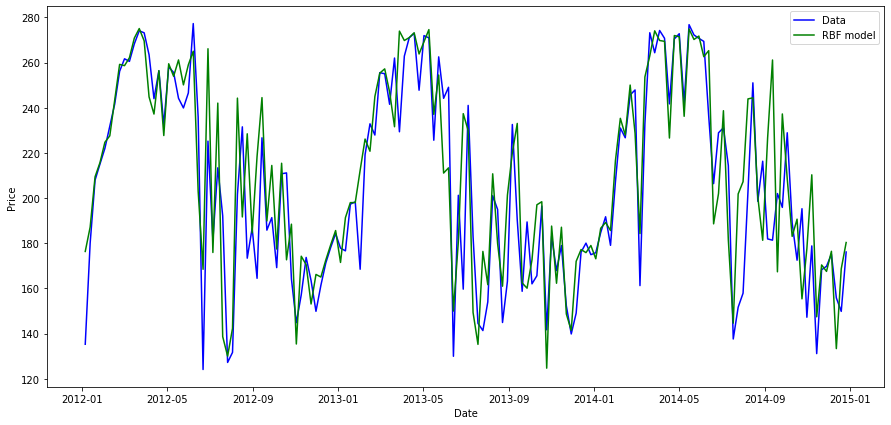

In [20]:
plt.figure(figsize = (15,7))
plt.plot(y_w[626:-1].index, y_w[626:-1], color= 'blue', label= 'Data')
plt.plot(y_w[626:-1].index,np.asarray(yhat).reshape(156,) , color= 'green', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [21]:
df1 = pd.DataFrame(columns=['Date','GHI'])
df1['Date'] = y_w[626:-1].index
df1['GHI'] = np.asarray(yhat).reshape(156,)
df1.to_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Telangana1/LSTMweekly.csv')

In [22]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_w[626:-1],np.asarray(yhat).reshape(156,),squared=False)

22.559236994528064

In [23]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_w[626:-1],np.asarray(yhat).reshape(156,))

0.08387323527529122